In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

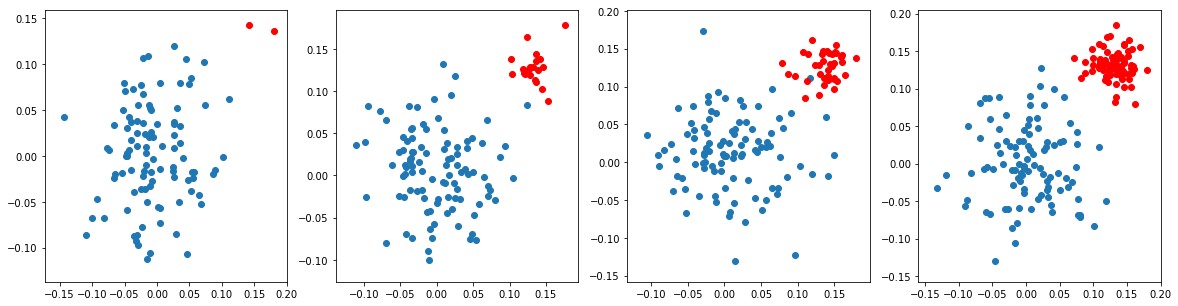

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1,4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

## Task 1: Applying SVM

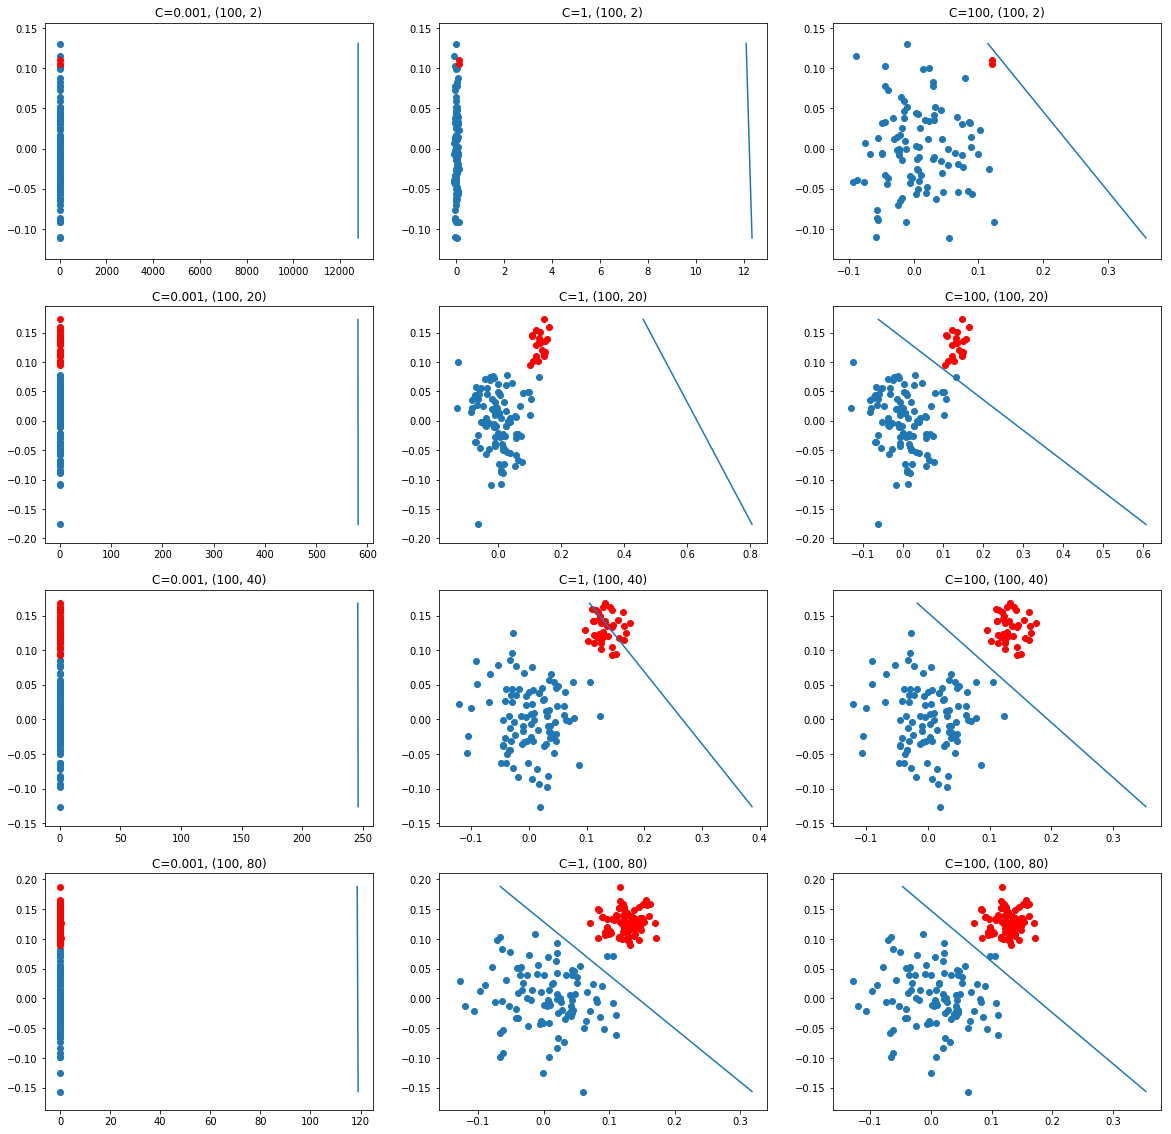

In [4]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c=[0.001,1,100]
plt.figure(figsize=(20,20))
grid=1
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3): 
        plt.subplot(4,3,grid)
        grid+=1
        clf=SVC(C=c[k],gamma='auto',kernel='linear')
        clf.fit(X,y)
        coeff=clf.coef_
        intercept=clf.intercept_
        mi=np.min(X[:,1])
        ma=np.max(X[:,1])
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        draw_line(coeff[0],intercept,mi,ma)
        plt.title('C='+str(c[k])+', '+str(i))
plt.show()

<h2>Observations:</h2><br>
1.when c is very small(0.001), the model(SVM) is unable to classify the data<br>
  we can see that the hyper plane postion is far away from the data points<br>
  data is balanced or imbalaned doesnot matter when c is very small.<br><br>
2.when c=1<br>
  in case of data is imbalanced(100,2), the hyper plane is far away from datapoints<br>
 we cannot classfiy the data which is imbalanced<br>
 as the data balancing factor is increasing we can see hyper plane moving towards the datapoints<br>
 in case of (100,40) imbalanced data, we can see hyper plane start moving towards the datapoints<br>
 also same in case of dataset is almost balanced in last case(100,80), we can see model is classfiying but with few erros<br>
 model seems to worked when data is balanced.<br><br>
3.when c=100<br>
  we can see that model is not classfiying perfectly <br>
 if c value is very high we will get smaller margins<br>
 so either data is balanced or imbalanced, there is a high chance for misclassfication rate.

## Task 2: Applying LR

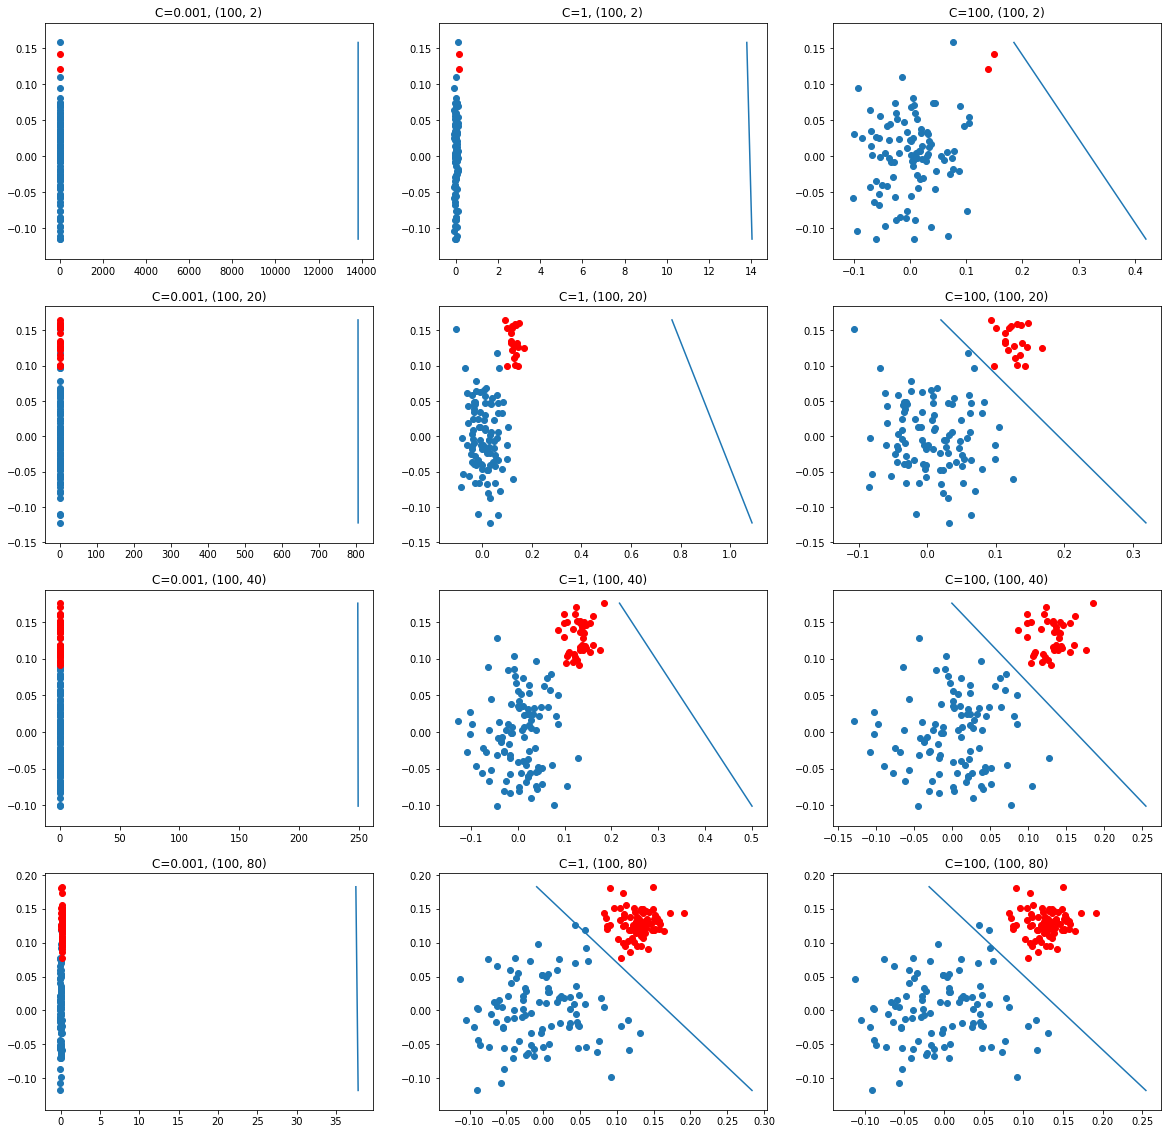

In [5]:
#you can start writing code here.
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
c=[0.001,1,100]
plt.figure(figsize=(20,20))
grid=1
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for k in range(3): 
        plt.subplot(4,3,grid)
        grid+=1
        clf = LogisticRegression(C=c[k])
        clf.fit(X,y)
        coeff=clf.coef_
        intercept=clf.intercept_
        mi=np.min(X[:,1])
        ma=np.max(X[:,1])
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        draw_line(coeff[0],intercept,mi,ma)
        plt.title('C='+str(c[k])+', '+str(i))
plt.show()

<h2>Observations:</h2><br>
1.when c is very small(0.001), the model(Logistic regression) is unable to classify the data<br>
  we can see that the decision boundary  postion is far away from the data points<br>
  data is balanced or imbalaned doesnot matter when c is very small.<br><br>
2.when c=1<br>
  in case of data is imbalanced(100,2),(100,20),the decision boundary is far away from datapoints<br>
 we cannot classfiy the datasets which is imbalanced (100,40)<br>
 as the data balancing factor is increasing we can see decision boundary is  moving towards the datapoints<br>
 dataset is almost balanced in last case(100,80), we can see model is classfiying with few erros<br>
 model seems to worked when data is balanced.<br><br>
3.when c=100<br>
 in case of imbalanced data (100,2),the model is unable to classfiy the data
 in the next cases(2,3,4),we can see that model is not classfiying the data perfectly <br>
 if c value is very high, model  will not classfiy the data perfectly<br>
 so either data is balanced or imbalanced, there is a high chance for misclassfication rate.